In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

# Make dataset

In [51]:
columns = ['fpkm_unstranded', 'fpkm_uq_unstranded']
genes = ['BRCA1', 'BRCA2']
genes_dict = {g: pd.DataFrame(columns=['id', *columns]) for g in genes}

path = './data'
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.tsv'):
            file_path = os.path.join(root, file)
            id = file.split('.')[0]
            try:
                df = pd.read_csv(file_path, sep='\t', comment='#')
                df = df[~df['gene_id'].isin(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'])]
                for g in genes:
                    b1 = df[df['gene_name']==g]
                    d = {'id':id}
                    for c in columns:
                        d[c]=b1[c]
                    
                    genes_dict[g] = pd.concat([genes_dict[g], pd.DataFrame(d)], ignore_index=True)

                
            except Exception as e:
                print(f"Errore nella lettura del file {file_path}: {e}")

genes_dict

{'BRCA1':                                      id  fpkm_unstranded  fpkm_uq_unstranded
 0  5842a066-d158-474e-a4db-034f5797d865           7.5137              8.1128
 1  c33ecc28-d5ba-4416-b93d-445b7883b6e8           1.0558              1.2465
 2  dc857517-6b3d-4008-85a4-a2b35efb1e7a           1.1685              1.1498,
 'BRCA2':                                      id  fpkm_unstranded  fpkm_uq_unstranded
 0  5842a066-d158-474e-a4db-034f5797d865           0.5386              0.5815
 1  c33ecc28-d5ba-4416-b93d-445b7883b6e8           0.4400              0.5195
 2  dc857517-6b3d-4008-85a4-a2b35efb1e7a           0.5505              0.5417}

In [74]:
os.makedirs('./data/dataset', exist_ok=True)
for k, v in genes_dict.items():
    v.to_csv(f'./data/dataset/{k}.csv', index=False)

# Data visualization

In [70]:
gene_name = 'BRCA1'
df = pd.read_csv(f'./data/dataset/{gene_name}.csv')
print(df)

                                     id  fpkm_unstranded  fpkm_uq_unstranded
0  5842a066-d158-474e-a4db-034f5797d865           7.5137              8.1128
1  c33ecc28-d5ba-4416-b93d-445b7883b6e8           1.0558              1.2465
2  dc857517-6b3d-4008-85a4-a2b35efb1e7a           1.1685              1.1498


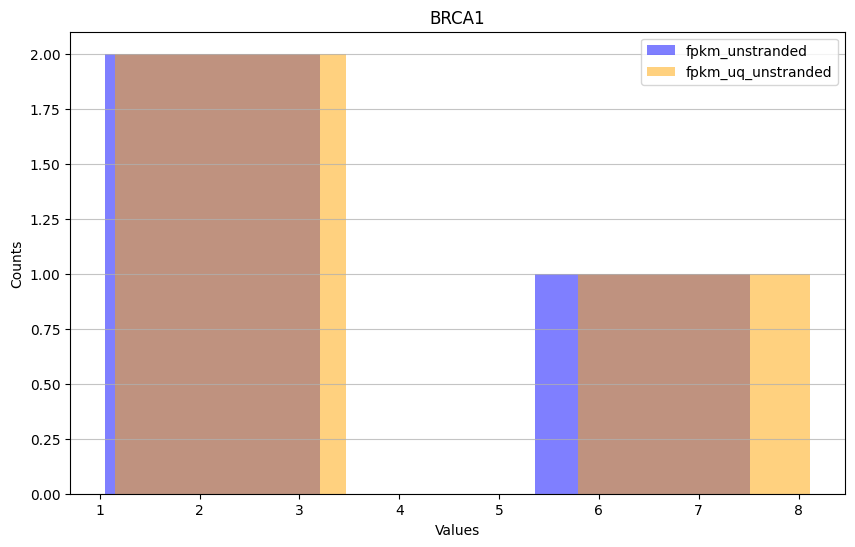

In [73]:

plt.figure(figsize=(10, 6))
plt.hist(df['fpkm_unstranded'], bins=3, alpha=0.5, label='fpkm_unstranded', color='blue')
plt.hist(df['fpkm_uq_unstranded'], bins=3, alpha=0.5, label='fpkm_uq_unstranded', color='orange')
plt.title(f'{gene_name}')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()